In [25]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# Set random seed for reproducibility
random_seed = 1000
np.random.seed(random_seed)

# Create and scale dataset
X, _ = make_blobs(n_samples=500, centers=2, cluster_std=5.0, random_state=random_seed)

scaler = StandardScaler(with_std=True)
Xs = scaler.fit_transform(X) + np.array([3., 3.])
Xs /= 6.

# Compute eigenvalues and eigenvectors
Q = np.cov(Xs.T)
eigu, eigv = np.linalg.eig(Q)

# Apply the Oja's rule
W_oja = np.random.normal(scale=0.25, size=(2, 1))
prev_W_oja = np.ones((2, 1))

learning_rate = 0.05

In [26]:
X.shape

(500, 2)

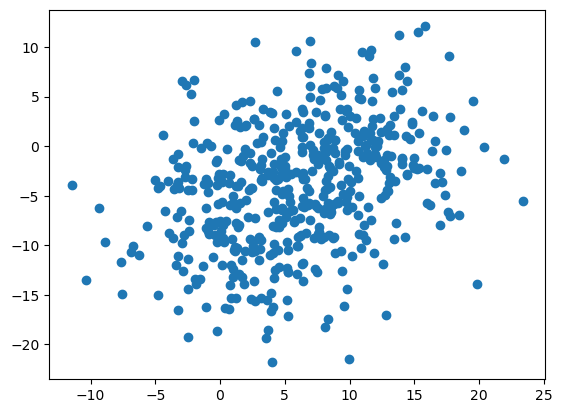

In [27]:
plt.figure()
plt.scatter(X[:,0], X[:,1])

In [28]:
np.mean(X)

0.9512610365466099

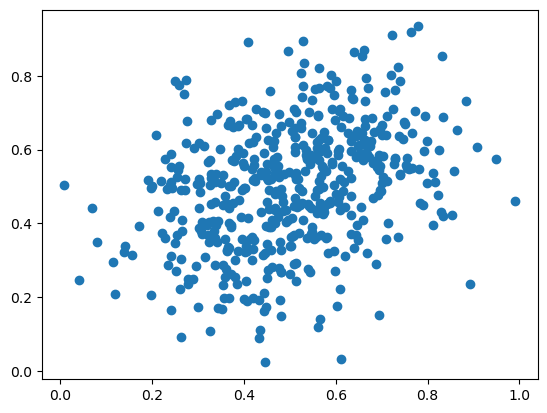

In [29]:
plt.figure()
plt.scatter(Xs[:,0], Xs[:,1])

In [30]:
np.mean(Xs), np.min(Xs)

(0.4999999999999999, 0.008524401971736317)

In [31]:
Q

array([[0.02783344, 0.00918005],
       [0.00918005, 0.02783344]])

In [32]:
eigv

array([[-0.70710678, -0.70710678],
       [ 0.70710678, -0.70710678]])

In [33]:
W_oja_init = W_oja.copy()

In [34]:
W_oja_init

array([[-0.20111458],
       [ 0.08023289]])

In [35]:
def W_norm(W):
    return np.sum(np.square(W))

In [36]:
W_norm(W_oja_init)

0.046884388751718555

In [37]:
def relu(x):
    y = x.copy()
    y[x <= 0] = 0.
    return y

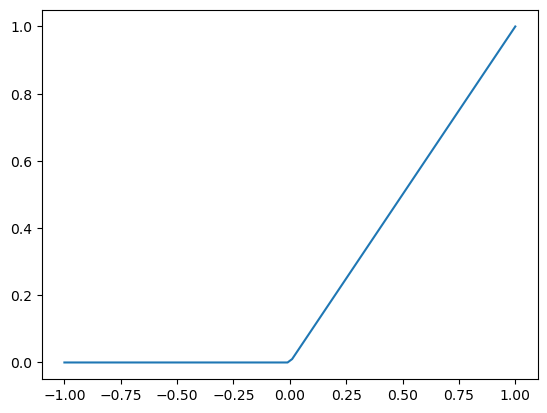

In [38]:
plt.figure()
x = np.linspace(-1, 1, 100)
plt.plot(x, relu(x))

In [44]:
W_oja = W_oja_init.copy()
W_norm_history = []
Y_history = []
xs_history = []
epochs = 10
for epoch in range(epochs):
    for i in range(Xs.shape[0]):
        xs = Xs[i]
        xs_history.append(xs)
        prev_W_oja = W_oja.copy()
        xs_mean_subtracted = xs - np.mean(xs_history[-10:], axis=0)
        # Ys = relu(np.dot(xs_mean_subtracted, W_oja))
        Ys = relu(np.dot(xs, W_oja))
        # Ys = np.dot(xs, W_oja)
        Y_history.append(Ys)
        W_oja += learning_rate * np.sum(Ys*xs_mean_subtracted - np.square(Ys)*W_oja.T, axis=0).reshape((2, 1))
        W_norm_history.append(W_norm(W_oja))

In [45]:
np.mean(xs_history[-10:], axis=0)

array([0.55938518, 0.57212261])

In [46]:
W_norm(W_oja)

0.056437757155637196

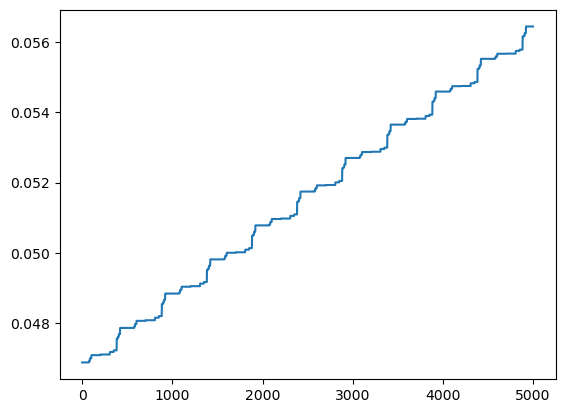

In [47]:
plt.figure()
plt.plot(W_norm_history)

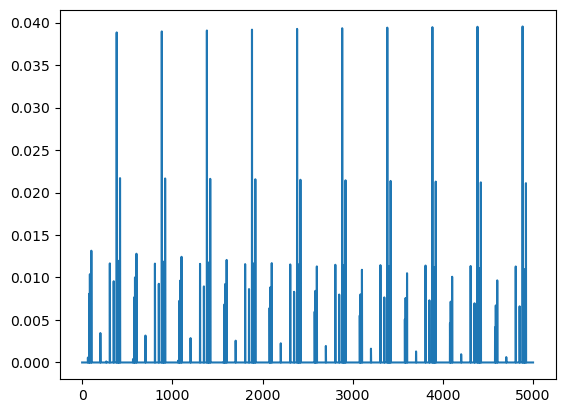

In [48]:
plt.figure()
plt.plot(Y_history)

In [49]:
Y_history[-10:]

[array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.]),
 array([0.])]

In [21]:
W_oja

array([[-0.50565708],
       [-0.49476241]])

In [22]:
eigv

array([[-0.70710678, -0.70710678],
       [ 0.70710678, -0.70710678]])

In [23]:
def unit_vector(vector):
    """ Returns the unit vector of the vector.  """
    return vector / np.linalg.norm(vector)

def angle_between(v1, v2):
    """ Returns the angle in radians between vectors 'v1' and 'v2'::

            >>> angle_between((1, 0, 0), (0, 1, 0))
            1.5707963267948966
            >>> angle_between((1, 0, 0), (1, 0, 0))
            0.0
            >>> angle_between((1, 0, 0), (-1, 0, 0))
            3.141592653589793
    """
    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)
    return np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0))

In [24]:
angle_between(W_oja.T, eigv[0]) / np.pi * 180.

array([0.62393193])